# CSC532 - Machine Learning

Course Project Semester 1/2019

In [1]:
import nltk
import numpy as np
import random
import string # to process standard python strings

In [2]:
# Download only at the first time
#nltk.download('punkt')
#nltk.download('wordnet')

### Corpus
#### Wikipeidia corpus
To copy the contents from the Wikipedia page for "Chatbot" and place it in a text file named "chatbot.txt"



In [3]:
f=open('chatbot.txt','r',errors = 'ignore')
raw=f.read()
print(raw)

Chatbot
From Wikipedia, the free encyclopedia
Jump to navigationJump to search
A chatbot (also known as a smartbots, talkbot, chatterbot, Bot, IM bot, interactive agent, Conversational interface or Artificial Conversational Entity) is a computer program or an artificial intelligence which conducts a conversation via auditory or textual methods.[1] Such programs are often designed to convincingly simulate how a human would behave as a conversational partner, thereby passing the Turing test. Chatbots are typically used in dialog systems for various practical purposes including customer service or information acquisition. Some chatterbots use sophisticated natural language processing systems, but many simpler systems scan for keywords within the input, then pull a reply with the most matching keywords, or the most similar wording pattern, from a database.

The term "ChatterBot" was originally coined by Michael Mauldin (creator of the first Verbot, Julia) in 1994 to describe these conversa

In [4]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt


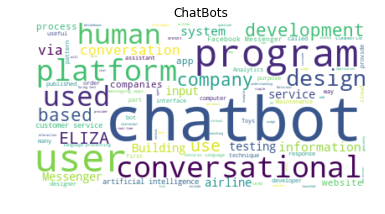

In [ ]:
def cloud(text):
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("ChatBots")
    # Save the image in the img folder:
    # wordcloud.to_file("wordcloud.png")
    
cloud(raw)

## 1. Pre-processing data
<ul>
<li>To convert to list of sentences</li>
<li>To convert to list of words</li>
</ul>

In [ ]:
sentence_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [ ]:
print(sentence_tokens[:2])

['Chatbot\nFrom Wikipedia, the free encyclopedia\nJump to navigationJump to search\nA chatbot (also known as a smartbots, talkbot, chatterbot, Bot, IM bot, interactive agent, Conversational interface or Artificial Conversational Entity) is a computer program or an artificial intelligence which conducts a conversation via auditory or textual methods.', '[1] Such programs are often designed to convincingly simulate how a human would behave as a conversational partner, thereby passing the Turing test.']


In [ ]:
print(word_tokens[:2])

['Chatbot', 'From']


### Lemmatization: 
A slight variant of stemming is lemmatization. The major difference between these is, that, stemming can often create non-existent words, whereas lemmas are actual words. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma. 

For example, “run” is a base form for words like “running” or “ran” or that the word “better” and “good” are in the same lemma so they are considered the same.


In [ ]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
# To define a function for a greeting by keyword matching
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)

GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

### Generating Response
To generate a response from our bot for input questions, the concept of document similarity will be used. So we begin by importing necessary modules.

This approach to scoring is called **Term Frequency-Inverse Document Frequency**, or **TF-IDF** for short, where:
Term Frequency: is a scoring of the frequency of the word in the current document.

> TF = (Number of times term t appears in a document) / (Number of terms in the document)

In [ ]:
# to convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

*Inverse Document Frequency*: is a scoring of how rare the word is across documents. 

> IDF = 1+log(N/n), 

where, N is the number of documents and n is the number of documents a term t has appeared in.

In [ ]:
# Also, to import cosine similarity module from scikit learn library
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def response(user_response):
    robo_response=''
    
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sentence_tokens)
    
    # This will be used to find the similarity between words entered by the user and the words in the corpus. 
    vals = cosine_similarity(tfidf[-1], tfidf)
    
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    
    if(req_tfidf==0):
        robo_response = robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response + sentence_tokens[idx]
        return robo_response

In [ ]:
flag=True
print("SITA: My name is SITA. I will answer your queries about Chatbots. If you want to exit, type Bye!")

while(flag==True):
    user_response = input()
    user_response = user_response.lower()
    if(user_response != 'bye'):
        
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("SITA: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("SITA: "+greeting(user_response))
            else:
                sentence_tokens.append(user_response)
                word_tokens = word_tokens + nltk.word_tokenize(user_response)
                final_words = list(set(word_tokens))
                print("SITA: ",end="")
                print(response(user_response))
                sentence_tokens.remove(user_response)
    else:
        flag=False
        print("SITA: Bye! take care..")

SITA: My name is SITA. I will answer your queries about Chatbots. If you want to exit, type Bye!
